# LRS Mixing

In [1]:
import cv2
import numpy as np
import glob,os
import librosa
import numpy as np
import scipy


from moviepy.editor import *
import matplotlib.pyplot as plt   
import IPython.display as ipd


In [73]:
path_vid = "/home/data2/kbh/LRS3/test/0Fi83BHQsMA/00002.mp4"
path_vid2 = "/home/data2/kbh/LRS2/main/5535423430009926848/00001.mp4"
path_rir = "/home/data2/kbh/UMA8_data/RIR/R907/TSP_deg_000_room_R907_dist_1.5m_20230524.mat"
path_rir2 = "/home/data2/kbh/UMA8_data/RIR/R907/TSP_deg_030_room_R907_dist_1.5m_20230524.mat"

25.0
43
44100
(43, 224, 224)
(74970, 2)


(4, 140505)


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'mp4 / MP4 (MPEG-4 Part 14)'
[mp4 @ 0x564e6e29f000] Could not find tag for codec vp8 in stream #0, codec not currently supported in container


==  2 ==
(50273, 2)


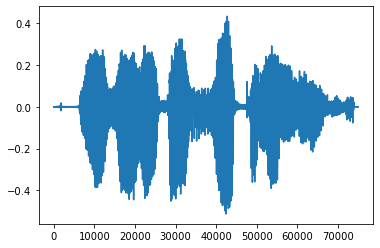

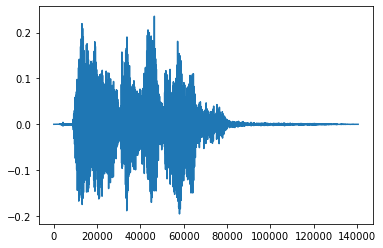

In [83]:
video = VideoFileClip(path_vid)
print(video.fps)
fps = video.fps
print(video.reader.nframes)

audio = video.audio
print(audio.fps)
vid = []
for frame in video.iter_frames() :
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    vid.append(gray)
vid = np.array(vid)
print(vid.shape)

raw = audio.to_soundarray()
print(raw.shape)

ipd.display(ipd.Audio(raw[:,0], rate=audio.fps))
# Vid 
#out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (vid.shape[2],vid.shape[1]), False)
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'VP80'), fps, (vid.shape[2],vid.shape[1]))
for i in range(vid.shape[0]):
    out.write(vid[i])
out.release()

np.save("output.np", vid)


# Mix

RIR = scipy.io.loadmat(path_rir)["ir"]
# select cross part of UMA-8
RIR = RIR[:,[2,3,5,6]]

signal = []
for j in range(4) : 
    s = scipy.signal.convolve(raw[:,0],RIR[:,j])
    signal.append(s)
signal = np.array(signal)
print(signal.shape)
plt.figure()
plt.plot(raw[:,0])
plt.figure()
plt.plot(signal[0])


ipd.display(ipd.Audio(signal[0], rate=audio.fps))


print("==  2 ==")
video2 = VideoFileClip(path_vid2)
audio2 = video2.audio
raw2 = audio2.to_soundarray()
print(raw2.shape)
ipd.display(ipd.Audio(raw2[:,0], rate=audio.fps))

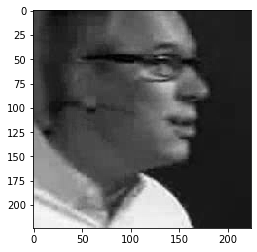

In [75]:
plt.imshow(vid[0], interpolation='nearest',cmap='gray')
plt.show()

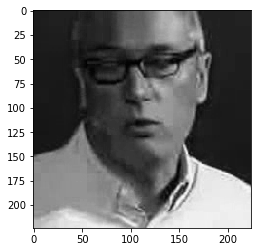

In [76]:
plt.imshow(vid[-1], interpolation='nearest',cmap='gray')
plt.show()

In [79]:
video.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [16]:
ipd.display(ipd.from_file("output.mp4"))

AttributeError: module 'IPython.display' has no attribute 'from_file'